# Introduction to Qiskit 

## DEBASMITA BHOUMIK
## Research Scholar, Indian Statistical Institute, Kolkata

### How to Quantum Compute? Winter School on Quantum Computing
### December 12 - December 15, 2022, IISER Kolkata, Mohanpur




### importing libraries

In [7]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.quantum_info import Statevector

from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer import AerSimulator

import matplotlib.pyplot as plt

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

backend = AerSimulator() 

ibmqfactory.load_account:WARNING:2022-12-12 23:53:39,485: Credentials are already in use. The existing account in the session will be replaced.


## I.1: Basic Rotations on One Qubit and Measurements on the Bloch Sphere

Before getting into complicated circuits on many qubits, let us start by looking at a single qubit. 

Read this chapter: https://qiskit.org/textbook/ch-states/introduction.html to learn more.

By default, states in qiskit start in $|0\rangle$, which corresponds to "arrow up" on the Bloch sphere. Play around with the gates $X$, $Y$, $Z$, $H$, $S$ and $S^\dagger$ to get a feeling for the different rotations. To do so, insert combinations of the following code lines in the lines indicated in the program:

    qc.x(0)    # rotation by Pi around the x-axis
    qc.y(0)    # rotation by Pi around the y-axis
    qc.z(0)    # rotation by Pi around the z-axis
    qc.s(0)    # rotation by Pi/2 around the z-axis
    qc.sdg(0)  # rotation by -Pi/2 around the z-axis
    qc.h(0)    # rotation by Pi around an axis located halfway between x and z

Try to reach the given state in the Bloch sphere in each of the following exercises. (Press Shift + Enter to run a code cell)
### 1.) Let us start easy by performing a bit flip. The goal is to reach the state $|1\rangle$. 


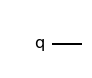

In [20]:
qc = QuantumCircuit(1)
qc.draw('mpl')

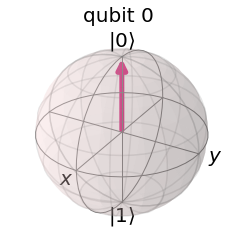

In [21]:
plot_bloch_multivector(qc)

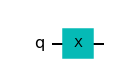

In [22]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')



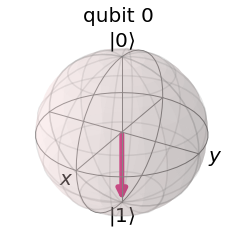

In [23]:
plot_bloch_multivector(qc)

### 2.) Next, we would like to create superposition. The goal is to reach the state $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$. 


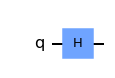

In [24]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')



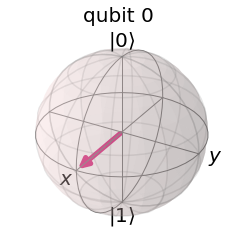

In [25]:
plot_bloch_multivector(qc)

### 3.) Let's combine those two. The goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. 
### and also learn to write a function



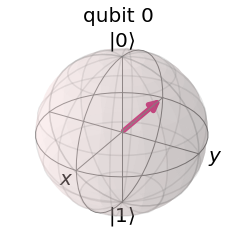

In [26]:
def lab1_ex3():
    qc = QuantumCircuit(1)

    qc.h(0)
    qc.y(0)
    
    return qc

state = Statevector.from_instruction(lab1_ex3())
plot_bloch_multivector(state)

### 4.) Finally, we move on to the complex numbers. The goal is to reach the state $|- i\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle\right)$. 

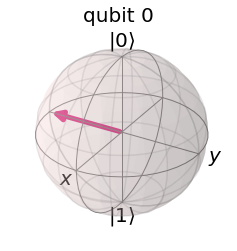

In [27]:
def lab1_ex4():
    qc = QuantumCircuit(1)
    qc.h(0) 
    qc.sdg(0)
    
    return qc

state = Statevector.from_instruction(lab1_ex4())
plot_bloch_multivector(state)

## I.2: Quantum Circuits Using Multi-Qubit Gates
Great job! Now that you've understood the single-qubit gates, let us look at gates on multiple qubits.
Check out this chapter if you would like to refresh the theory: https://qiskit.org/textbook/ch-gates/introduction.html. The basic gates on two and three qubits are given by

    qc.cx(c,t)       # controlled-X (= CNOT) gate with control qubit c and target qubit t
    qc.cz(c,t)       # controlled-Z gate with control qubit c and target qubit t
    qc.ccx(c1,c2,t)  # controlled-controlled-X (= Toffoli) gate with control qubits c1 and c2 and target  t
    qc.swap(a,b)     # SWAP gate that swaps the states of qubit a and qubit b



### The first quantum circuit

We can define the number of quantum and classical registers that we want. A quantum register is a qubits, and a classical register is a bit that will hold the measurement outcome of the qubit. A QuantumCircuit is an object that takes the quantum and classical registers.


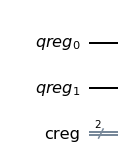

In [28]:
# initialize a quantum circuit with 2 qubits and 2 cbits
qc = QuantumCircuit()
qr = QuantumRegister(2, 'qreg')
cr = ClassicalRegister(2, 'creg') #labeling qreg creg is optional
qc.add_register(qr)
qc.add_register(cr)
qc.draw('mpl')

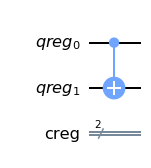

In [29]:
qc.cx(qr[0], qr[1])
qc.draw('mpl')

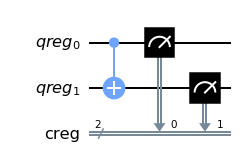

In [30]:
qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])

qc.draw('mpl')


# Measuring the qubits

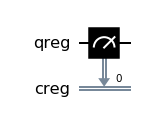

In [31]:
qc = QuantumCircuit()
qr = QuantumRegister(1, 'qreg')
cr = ClassicalRegister(1, 'creg') #labeling qreg creg is optional
qc.add_register(qr)
qc.add_register(cr)

qc.measure(qr[0],cr[0])
    
qc.draw('mpl')

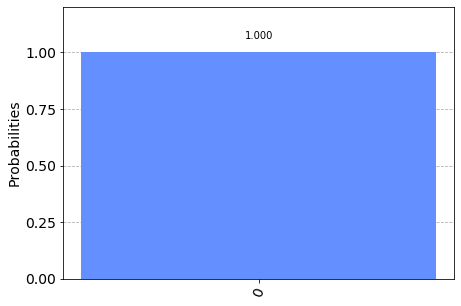

In [32]:
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

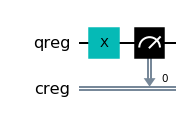

In [33]:
# initialize a quantum circuit with 2 qubits and 2 cbits
qc = QuantumCircuit()
qr = QuantumRegister(1, 'qreg')
cr = ClassicalRegister(1, 'creg') #labeling qreg creg is optional
qc.add_register(qr)
qc.add_register(cr)

qc.x(qr[0])


qc.measure(qr[0],cr[0])
    
qc.draw('mpl')

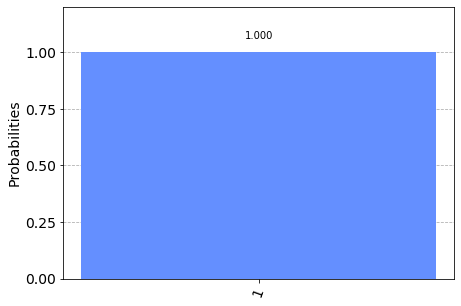

In [34]:
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

Now we start with an easy gate on two qubits, the controlled-NOT (also CNOT) gate . As it has no effect applied on two qubits in state $|0\rangle$, we apply a Hadamard gate before to bring the control qubit in superposition. This way, we can create entanglement. The resulting state is one of the so-called Bell states. 
### 5.) Construct the Bell state $|\Psi^+\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$.

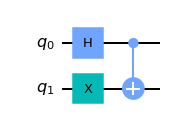

In [35]:
def lab1_ex5():
    qc = QuantumCircuit(2) # this time, we not only want two qubits, but also two classical bits for the measurement
  
    # FILL YOUR CODE IN HERE
    qc.x(1)
    qc.h(0)
    qc.cx(0,1)
    #qc.measure_all()
    
    return qc

qc = lab1_ex5()
qc.draw('mpl') # we draw the circuit

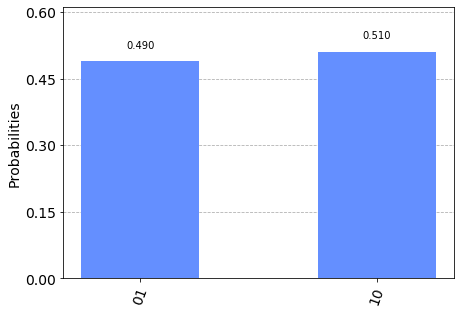

In [36]:
 # we measure all the qubits
qc.measure_all()
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

## TASK 1
## Construct the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$.

## HOME WORK
### CONSTRUCT THE TWO OTHER BELL STATES SHOWN IN THE CLASS

# NOISE

In [37]:
from qiskit import QuantumCircuit
from qiskit.providers.fake_provider import FakeVigo

# Get a fake backend from the fake provider
backend = FakeVigo()

transpiled_circuit = transpile(qc, backend)
transpiled_circuit.draw('mpl')

ModuleNotFoundError: No module named 'qiskit.providers.fake_provider'

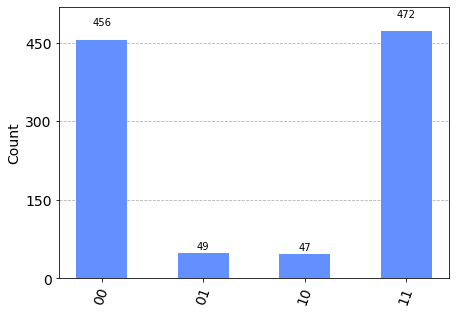

In [36]:
from qiskit.tools.visualization import plot_histogram

# Run the transpiled circuit using the simulated fake backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

# Initializing qubits to arbitrary states

### We can initialize a qubit in any arbitrary state as required. 
let us initialize a qubit in the state $\frac{\sqrt{3}}{2}|0> + \frac{1}{2}|1>$

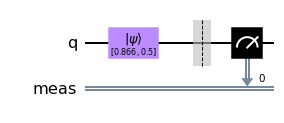

In [39]:
qc = QuantumCircuit(1)
qc.initialize([np.sqrt(3)/2,1/2],0)
qc.measure_all()
qc.draw('mpl')

### let us measure

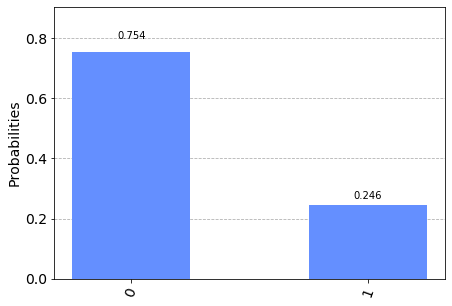

In [40]:
counts = execute(qc, backend, shots=10000).result().get_counts()
plot_histogram(counts)

## TASK 2


### Create a quantum state that will give a 1/3 probability of measuring |0⟩
### Create a different state vector that will give the same measurement probabilities.
### Verify that the probability of measuring |1⟩ for these two states is 2/3.

# Transpilation

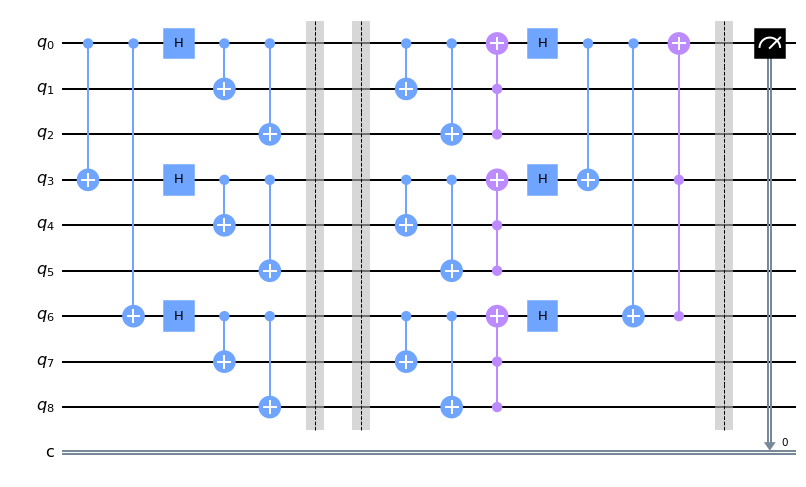

In [41]:



backend = provider.get_backend('ibmq_qasm_simulator')

q = QuantumRegister(1,'q')
c = ClassicalRegister(1,'c')

circuit = QuantumCircuit(q,c)

circuit.h(q[0])

####error here############
#circuit.x(q[0])#Bit flip error
#circuit.z(q[0])#Phase flip error
############################


#####Shor code starts here ########
q = QuantumRegister(9,'q')
c = ClassicalRegister(1,'c')

circuit = QuantumCircuit(q,c)

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

####error here############
#circuit.x(q[0])#Bit flip error
#circuit.z(q[0])#Phase flip error
############################

circuit.barrier(q)
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])

circuit.barrier(q)

circuit.measure(q[0],c[0])

circuit.draw(output='mpl',filename='shorcode.png') #Draws an image of the circuit



In [43]:
from qiskit import QuantumCircuit
from qiskit.providers.fake_provider import FakeGuadalupeV2

# Get a fake backend from the fake provider
backend = FakeGuadalupeV2()

transpiled_circuit = transpile(circuit, backend, basis_gates=['rz','cx','sx','x','id','swap'])
transpiled_circuit.draw('mpl')

ModuleNotFoundError: No module named 'qiskit.providers.fake_provider'

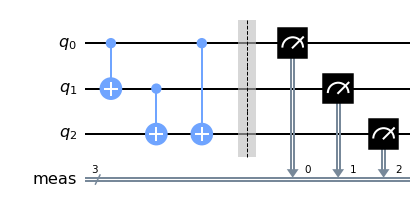

In [45]:
def lab1_ex5():
    qc = QuantumCircuit(3) # this time, we not only want two qubits, but also two classical bits for the measurement
  
    # FILL YOUR CODE IN HERE

    qc.cx(0,1)
    qc.cx(1,2)
    qc.cx(0,2)
    qc.measure_all()
    
    return qc

qc = lab1_ex5()
qc.draw('mpl') # we draw the circuit

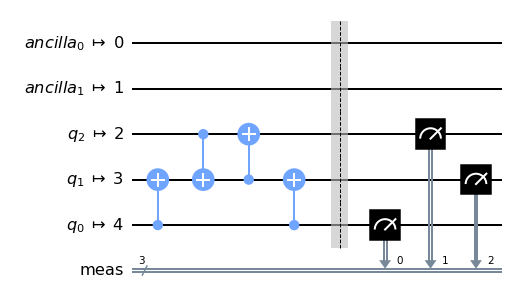

In [47]:
from qiskit import QuantumCircuit
from qiskit.providers.fake_provider import FakeManilaV2

# Get a fake backend from the fake provider
backend = FakeManilaV2()

transpiled_circuit = transpile(qc, backend, basis_gates=['rz','cx','sx','x','id','swap'])
transpiled_circuit.draw()

### Qiskit tends to use circuit identities to optimize the circuit. So if we have a circuit that has two X gates acting sequentially, qiskit will remove both the gates. But we may need to keep both the gates, although they result to identity (for example if you are studying the effect of noise on gates). This can be obtained by using barrier. Qiskit does not optimize the circuit accross a barrier.

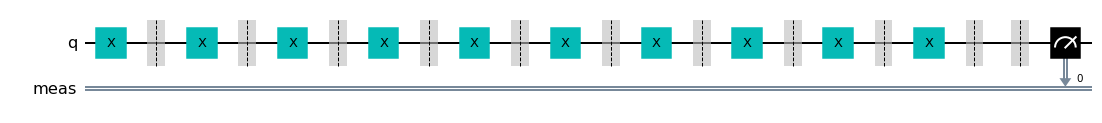

In [46]:
qc = QuantumCircuit(1)

for i in range(10):
    qc.x(0)
    qc.barrier()

qc.measure_all()
display(qc.draw('mpl'))

## You can define your own unitary gate also

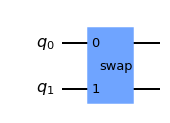

In [48]:
import qiskit.quantum_info as qi

qc1 = QuantumCircuit(2)
swap = np.matrix([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
qc1.unitary(qi.Operator(swap),[0,1],label='swap')
qc1.draw('mpl')

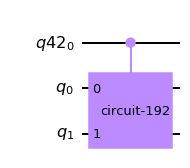

In [49]:
ctrl_swap = qc1.control()
display(ctrl_swap.draw('mpl'))
ctrl_swap = ctrl_swap.to_gate(label='ctrl_swap')

# Quantum Entanglement
### Let us now create an equal superposition state using 2 qubits, and look into the measurement outcome

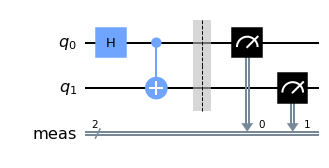

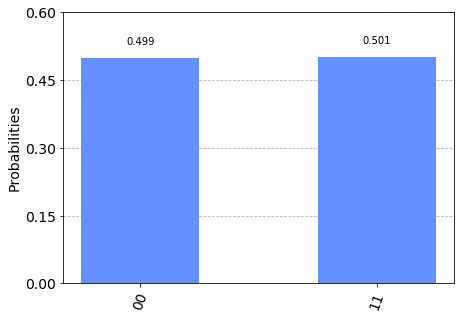

In [56]:
from qiskit import *
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
display(qc.draw('mpl'))

counts = execute(qc,backend=Aer.get_backend('qasm_simulator'), shots=10000).result().get_counts()
plot_histogram(counts)

## Looking into the state vector 

In [60]:
backend_sv = Aer.get_backend('statevector_simulator')

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

#qc.measure_all()

sv = execute(qc,backend_sv).result().get_statevector(qc)
sv

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

### In qasm simulator, the outcome is expected to have statistical error. The obtained outcome approaches the ideal outcome as shots increases. But statevector simulator can give us the exact probability distribution of the circuit.

In [58]:

sv.probabilities_dict()

AttributeError: 'numpy.ndarray' object has no attribute 'probabilities_dict'

## Let us now check the bloch sphere of a maximally entangled state, and try to interpret the result.

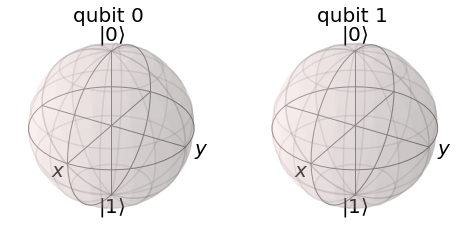

In [25]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

plot_bloch_multivector(qc)

# Let's go to quantum composer and do stuffs

##